In [471]:
import numpy as np
import random

In [472]:
import pandas as pd

In [473]:
n =10000

In [474]:
random.seed(7)

In [475]:
bandit_data = pd.DataFrame()

In [476]:
np.random.choice(2, 10, p=[0.6,0.4])

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [477]:
bandit_data['clicked_sports'] = np.random.choice(2, n, p=[0.6,0.4])

In [478]:
bandit_data['clicked_politics'] = np.random.choice(2, n, p=[0.7,0.3])

In [479]:
bandit_data['arm'] = np.random.choice(np.arange(0,3), n)

In [480]:
sp_map = {0:0.5,1:0.1,2:0.1}
p_map = {0:0.1,1:0.1,2:0.4}
b_map = {0:0.1,1:0.2,2:0.1}

In [481]:
bandit_data['sports_coef'] = bandit_data['arm'].map(sp_map)
bandit_data['politics_coef'] = bandit_data['arm'].map(p_map)
bandit_data['arm_baseline'] = bandit_data['arm'].map(b_map)

In [482]:
bandit_data.head()

,clicked_sports,clicked_politics,arm,sports_coef,politics_coef,arm_baseline
0,1,1,0,0.5,0.1,0.1
1,1,0,1,0.1,0.1,0.2
2,1,1,1,0.1,0.1,0.2
3,0,0,2,0.1,0.4,0.1
4,0,1,2,0.1,0.4,0.1


In [483]:
#bandit_data['rand_draw'] = np.random.uniform(low=0.0, high=1.0, size=n)

In [484]:
bandit_data['base'] = 1

In [485]:
bandit_data.head()

,clicked_sports,clicked_politics,arm,sports_coef,politics_coef,arm_baseline,base
0,1,1,0,0.5,0.1,0.1,1
1,1,0,1,0.1,0.1,0.2,1
2,1,1,1,0.1,0.1,0.2,1
3,0,0,2,0.1,0.4,0.1,1
4,0,1,2,0.1,0.4,0.1,1


In [486]:
bandit_data['click_factor'] =  bandit_data.base * bandit_data.arm_baseline + bandit_data.sports_coef * bandit_data.clicked_sports + bandit_data.politics_coef * bandit_data.clicked_politics

In [487]:
bandit_data.head(2)

,clicked_sports,clicked_politics,arm,sports_coef,politics_coef,arm_baseline,base,click_factor
0,1,1,0,0.5,0.1,0.1,1,0.7
1,1,0,1,0.1,0.1,0.2,1,0.3


In [488]:
#bandit_data['click'] = np.where(bandit_data['click_factor']>=bandit_data['rand_draw'], 1, 0)

In [489]:
bandit_data['click'] = np.random.binomial(1, bandit_data['click_factor'])

In [490]:
bandit_data.head()

,clicked_sports,clicked_politics,arm,sports_coef,politics_coef,arm_baseline,base,click_factor,click
0,1,1,0,0.5,0.1,0.1,1,0.7,1
1,1,0,1,0.1,0.1,0.2,1,0.3,0
2,1,1,1,0.1,0.1,0.2,1,0.4,0
3,0,0,2,0.1,0.4,0.1,1,0.1,0
4,0,1,2,0.1,0.4,0.1,1,0.5,0


In [491]:
bandit_data.groupby(['arm', 'clicked_sports', 'clicked_politics'])['click'].sum()

arm  clicked_sports  clicked_politics
0    0               0                   137
                     1                   120
     1               0                   520
                     1                   276
1    0               0                   262
                     1                   166
     1               0                   287
                     1                   163
2    0               0                   139
                     1                   292
     1               0                   179
                     1                   215
Name: click, dtype: int32

In [492]:
bandit_data.groupby(['arm', 'clicked_sports', 'clicked_politics'])['click'].mean()

arm  clicked_sports  clicked_politics
0    0               0                   0.097232
                     1                   0.208696
     1               0                   0.573951
                     1                   0.707692
1    0               0                   0.182833
                     1                   0.279461
     1               0                   0.312977
                     1                   0.390887
2    0               0                   0.098025
                     1                   0.471729
     1               0                   0.190223
                     1                   0.564304
Name: click, dtype: float64

In [493]:
bandit_data.groupby(['arm', 'clicked_sports', 'clicked_politics'])['click'].count()

arm  clicked_sports  clicked_politics
0    0               0                   1409
                     1                    575
     1               0                    906
                     1                    390
1    0               0                   1433
                     1                    594
     1               0                    917
                     1                    417
2    0               0                   1418
                     1                    619
     1               0                    941
                     1                    381
Name: click, dtype: int64

In [494]:
bandit_data.groupby(['arm', 'clicked_sports', 'clicked_politics']).click.agg(['sum','count','mean'])

sum  count      mean
arm clicked_sports clicked_politics                      
0   0              0                 137   1409  0.097232
                   1                 120    575  0.208696
    1              0                 520    906  0.573951
                   1                 276    390  0.707692
1   0              0                 262   1433  0.182833
                   1                 166    594  0.279461
    1              0                 287    917  0.312977
                   1                 163    417  0.390887
2   0              0                 139   1418  0.098025
                   1                 292    619  0.471729
    1              0                 179    941  0.190223
                   1                 215    381  0.564304

In [495]:
bandit_data.groupby(['arm', 'clicked_sports', 'clicked_politics']).click.agg(['sum','count','mean']).groupby(['clicked_sports', 'clicked_politics'])['mean'].max()

clicked_sports  clicked_politics
0               0                   0.182833
                1                   0.471729
1               0                   0.573951
                1                   0.707692
Name: mean, dtype: float64

*arm 1 is best for people who clicked nothing
*arm 2 is best for people who clicked politics
*arm 0 is best for people who clicked sports or both

In [496]:
# lin_ucb

In [497]:
bandit_data.head()

,clicked_sports,clicked_politics,arm,sports_coef,politics_coef,arm_baseline,base,click_factor,click
0,1,1,0,0.5,0.1,0.1,1,0.7,1
1,1,0,1,0.1,0.1,0.2,1,0.3,0
2,1,1,1,0.1,0.1,0.2,1,0.4,0
3,0,0,2,0.1,0.4,0.1,1,0.1,0
4,0,1,2,0.1,0.4,0.1,1,0.5,0


In [498]:
bandit_data.iloc[0][['base','clicked_sports','clicked_politics']].values.reshape(-1,1).shape

(3, 1)

In [499]:
from sklearn import linear_model

In [500]:
class DisjointContextAction:
    """ Contextual action with disjoint linear model.

        A contextual action such that the relation between the features and parameters are linear. Assume that the parameters are not
        shared accross different actions (Disjoint).

    Attributes:
        reward              --Value of a reward
        dim                 --Number of dimensions in the linear model, including bias
        coefficients:       --Vector of coefficients for the linear model
        A                   --Updatable matrix of feature data from actions
        b                   --Rewards from action usage
        __Ainv              --Cached version of the inverse of A
    """

    def __init__(self,  dimension:int):
        """Instantiate contextual action."""
        self.dim:int = dimension
        #self.reward:float = reward
        self.coefficients:np.ndarray = np.zeros((self.dim, 1))
        self.A:np.ndarray = np.identity(self.dim)
        self.__Ainv:np.ndarray = np.identity(self.dim)
        self.b:np.ndarray = np.zeros((self.dim, 1))
        self.visits:int = 0
    
    def get_expected_reward(self, context:np.ndarray) -> float:
        """Compute expected reward given context."""
        context_t = context.transpose()
        return np.dot(context_t, self.coefficients)
    
    def compute_regression_coefficient(self):
        """Cache inverse of A and compute coefficients."""
        self.__Ainv = np.linalg.inv(self.A)
        self.coefficients = np.dot(self.__Ainv, self.b )

    def compute_ucb(self, parameter:float, context:np.ndarray) -> float:
        """Compute the upper confidence bound."""
        context_t = context.transpose()
        p:float = (np.dot(context_t, self.coefficients) + parameter * np.sqrt( np.dot(np.dot(context_t, self.__Ainv), context) ))[0,0]
        return p

    def update(self, context:np.ndarray, reward):
        """Update matrix A and vector b, recompute coefficients and cache A inverse."""
        context_t = context.transpose()
        self.A = np.add(self.A, np.dot(context, context_t))
       
        self.b = self.b + reward*context
        self.compute_regression_coefficient()
        
    def increment_visits(self):
        self.visits += 1

In [532]:
def simulate(num_samples,dim,num_arms,parameter,bandit_data):
    
    actions = [DisjointContextAction(dim) for i in range(num_arms)]
    arm_choice = np.zeros(num_samples).astype('int')    
    clc_sports = []
    clc_politics = []
    rewards = []
    arms = []
    norms = [[],[],[]]
    regret=[]
    for t in range(num_samples):
        context = bandit_data.iloc[t]
        #[a.compute_regression_coefficient for a in actions]
        index = np.argmax([a.compute_ucb(parameter,context[['base','clicked_sports','clicked_politics']].values.reshape(-1,1)) for a in actions])
        if context['arm'] == index:
            arm_choice[t] = index
        else:
            arm_choice[t] = t*10
            continue
        arms.append(arm_choice[t])  
        clc_sports.append(context['clicked_sports'])
        clc_politics.append(context['clicked_politics'])
        rewards.append(context['click'])
    
        actions[arm_choice[t]].update(context[['base','clicked_sports','clicked_politics']].values.reshape(-1,1),context['click'])
        #arm_choice[t] = index
        
        norms[arm_choice[t]].append(np.linalg.norm(actions[arm_choice[t]].coefficients - context[['arm_baseline','sports_coef','politics_coef']].values.reshape(-1,1),'fro') )
        reg = max([a.get_expected_reward(context[['base','clicked_sports','clicked_politics']].values.reshape(-1,1)) for a in actions]) - context['click_factor']
        regret.append(reg)
        
            
        
    coef = {}
    for i in range(len(actions)):
        coef[i] = actions[i].coefficients
    return arm_choice, coef ,arms,clc_sports,clc_politics,rewards, norms, regret

In [533]:
a,b,d, e, f, g, h, i= simulate(n,3,3,7,bandit_data)

In [534]:
bib = {'arms': d , 'clc_sports': e, 'clc_pol':f,'rewards':g}

In [535]:
df = pd.DataFrame(data=bib)

In [536]:
x1 = df[(df['arms']==0) & (df['clc_pol']==1.0) & (df['clc_sports']==1.0)]['rewards'].reset_index().drop('index', axis=1)

In [537]:
x2 = df[(df['arms']==1) & (df['clc_pol']==1.0) & (df['clc_sports']==1.0)]['rewards'].reset_index().drop('index', axis=1)

In [538]:
x3 = df[(df['arms']==2) & (df['clc_pol']==1.0) & (df['clc_sports']==1.0)]['rewards'].reset_index().drop('index', axis=1)

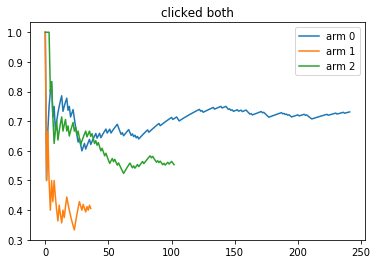

In [539]:
import matplotlib.pyplot as plt
plt.plot(x1.cumsum().values.reshape(-1,)/(np.arange(len(x1)) + 1), label = 'arm 0')
plt.plot(x2.cumsum().values.reshape(-1,)/(np.arange(len(x2)) + 1), label = 'arm 1')
plt.plot(x3.cumsum().values.reshape(-1,)/(np.arange(len(x3)) + 1), label = 'arm 2')
plt.legend()
plt.title('clicked both')
plt.show()

In [540]:
x1 = df[(df['arms']==0) & (df['clc_pol']==0.0) & (df['clc_sports']==1.0)]['rewards'].reset_index().drop('index', axis=1)

In [541]:
x2 = df[(df['arms']==1) & (df['clc_pol']==0.0) & (df['clc_sports']==1.0)]['rewards'].reset_index().drop('index', axis=1)

In [542]:
x3 = df[(df['arms']==2) & (df['clc_pol']==0.0) & (df['clc_sports']==1.0)]['rewards'].reset_index().drop('index', axis=1)

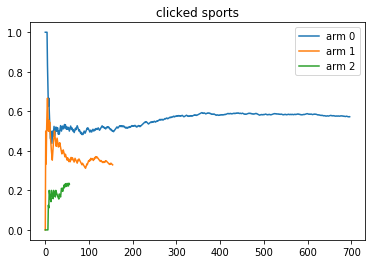

In [543]:
plt.plot(x1.cumsum().values.reshape(-1,)/(np.arange(len(x1)) + 1), label = 'arm 0')
plt.plot(x2.cumsum().values.reshape(-1,)/(np.arange(len(x2)) + 1), label = 'arm 1')
plt.plot(x3.cumsum().values.reshape(-1,)/(np.arange(len(x3)) + 1), label = 'arm 2')
plt.legend()
plt.title('clicked sports')
plt.show()

In [544]:
x1 = df[(df['arms']==0) & (df['clc_pol']==1.0) & (df['clc_sports']==0.0)]['rewards'].reset_index().drop('index', axis=1)

In [545]:
x2 = df[(df['arms']==1) & (df['clc_pol']==1.0) & (df['clc_sports']==0.0)]['rewards'].reset_index().drop('index', axis=1)

In [546]:
x3 = df[(df['arms']==2) & (df['clc_pol']==1.0) & (df['clc_sports']==0.0)]['rewards'].reset_index().drop('index', axis=1)


Text(0.5,1,'clicked politics')

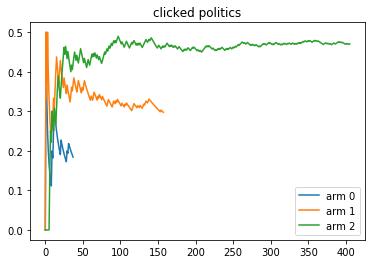

In [547]:
plt.plot(x1.cumsum().values.reshape(-1,)/(np.arange(len(x1)) + 1), label = 'arm 0')
plt.plot(x2.cumsum().values.reshape(-1,)/(np.arange(len(x2)) + 1), label = 'arm 1')
plt.plot(x3.cumsum().values.reshape(-1,)/(np.arange(len(x3)) + 1), label = 'arm 2')
plt.legend()
plt.title('clicked politics')

In [548]:
def lm_fun(data):
    lm = linear_model.LinearRegression()
    lm.fit(data[['clicked_sports','clicked_politics']], data['click'])
    return lm.coef_

In [549]:
bandit_data.groupby('arm').apply(lm_fun)

arm
0    [0.48332410781835555, 0.12038239616858282]
1        [0.12444124566174, 0.0890345191954807]
2    [0.09230903369571583, 0.37384924955984417]
dtype: object

In [550]:
b

{0: array([[0.08747276],
        [0.48728781],
        [0.14798568]]), 1: array([[0.16197777],
        [0.15675477],
        [0.12558372]]), 2: array([[0.10559837],
        [0.10042448],
        [0.36060139]])}

In [551]:
x1 = df[(df['arms']==0) & (df['clc_pol']==0.0) & (df['clc_sports']==0.0)]['rewards'].reset_index().drop('index', axis=1)

In [552]:
x2 = df[(df['arms']==1) & (df['clc_pol']==0.0) & (df['clc_sports']==0.0)]['rewards'].reset_index().drop('index', axis=1)

In [553]:
x3 = df[(df['arms']==2) & (df['clc_pol']==0.0) & (df['clc_sports']==0.0)]['rewards'].reset_index().drop('index', axis=1)

Text(0.5,1,'clicked nothing')

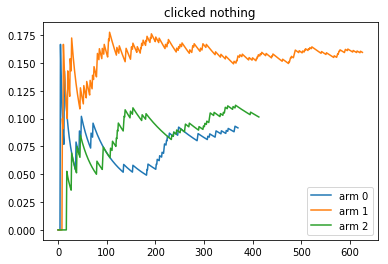

In [554]:
plt.plot(x1.cumsum().values.reshape(-1,)/(np.arange(len(x1)) + 1), label = 'arm 0')
plt.plot(x2.cumsum().values.reshape(-1,)/(np.arange(len(x2)) + 1), label = 'arm 1')
plt.plot(x3.cumsum().values.reshape(-1,)/(np.arange(len(x3)) + 1), label = 'arm 2')
plt.legend()
plt.title('clicked nothing')

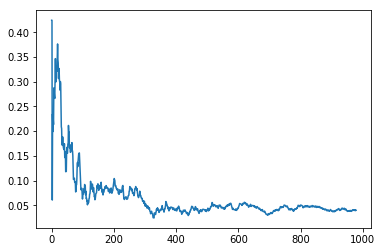

In [555]:
plt.plot(h[2])
plt.xlabel('iterations')
plt.ylabel('Norm of the difference between real and estimated coefficients')

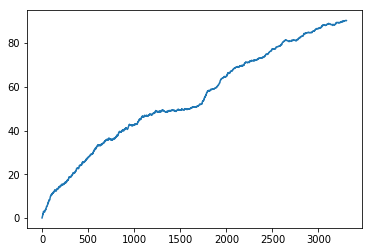

In [556]:
plt.plot(np.cumsum(i))

In [557]:
a

array([    0,     1,    20, ..., 99970,     0,     2])

In [560]:
b

{0: array([[0.08747276],
        [0.48728781],
        [0.14798568]]), 1: array([[0.16197777],
        [0.15675477],
        [0.12558372]]), 2: array([[0.10559837],
        [0.10042448],
        [0.36060139]])}

In [584]:
df1 = pd.DataFrame(columns = ['arm','term','real coefficients', 'estimated coefficients'])
df1['arm'] = [0,0,0,1,1,1,2,2,2]                              
df1['term'] = ['baseline','sport','politics','baseline','sport','politics','baseline','sport','politics']  
df1['estimated coefficients']   =   [b[0][0,0],b[0][1,0],b[0][2,0],b[1][0,0],b[1][1,0],b[1][2,0],b[2][0,0],b[2][1,0],b[2][2,0]]
df1['real coefficients'] = [0.1,0.5,0.1,0.2,0.1,0.1,0.1,0.1,0.4]

In [585]:
df1

,arm,term,real coefficients,estimated coefficients
0,0,baseline,0.1,0.087473
1,0,sport,0.5,0.487288
2,0,politics,0.1,0.147986
3,1,baseline,0.2,0.161978
4,1,sport,0.1,0.156755
5,1,politics,0.1,0.125584
6,2,baseline,0.1,0.105598
7,2,sport,0.1,0.100424
8,2,politics,0.4,0.360601


In [2]:
import numpy as np, types, warnings, multiprocessing
from copy import deepcopy
#from joblib import Parallel, delayed
import pandas as pd